In [64]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv('UCI_Credit_Card.csv')
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# No missing data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Weird column names.. renaming
raw_df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'def_pay'}, inplace=True)

In [5]:
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# More women than men, not too skewed
raw_df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

##### Consolidating unknowns into other for Education...

In [7]:
# Category 4 is the "Other" category. Categories 5 & 6 are "unknown" - reclassify as other
raw_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
edu_fill = (raw_df['EDUCATION'] == 5) | (raw_df['EDUCATION'] == 6) | (raw_df['EDUCATION'] == 0)
raw_df.loc[edu_fill, 'EDUCATION'] = 4
raw_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

##### Consolidating unknowns into other for Marriage...

In [9]:
# 3 is other. 0 must be unknown. Lump 0 in with 3
# 1 is married, 2 is single... other must be divorced or widowed... or those polyamorous relationships
raw_df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
mar_fill = (raw_df['MARRIAGE'] == 0)
raw_df.loc[mar_fill, 'MARRIAGE'] = 3
raw_df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [15]:
# Let's see how payments look...
raw_df.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

-1 means the individual paid on time. Why -1, I'm not sure. But if -1 is paid on time, and 1 is paid one month late, I assume -2 and 0 means the person paid on time as well.

So... judgement call. Let's lump -2, -1, 0 together as 0, which represents paid on time.

In [18]:
pay_cols = list(raw_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].columns)

In [20]:
pay_cols[0]

'PAY_1'

In [21]:
# Quick for loop to lump -2, -1, and 0 together for all payment columns
for col in pay_cols:
    pay_fill = (raw_df[col] == -2) | (raw_df[col] == -1) | (raw_df[col] == 0)
    raw_df.loc[pay_fill, col] = 0

In [23]:
# Did it work?
raw_df.PAY_1.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

In [63]:
df = raw_df

# Algorithm Models: Classification

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [79]:
# Split into predictors
X = df.drop('def_pay', axis=1)
y = df['def_pay']

# TTS then scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

scaler = StandardScaler()

# Scaling both X datasets. Make sure to just fit_transform training data
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Instantiating logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e5, solver='liblinear')

# Fit the model to normalized training data
logreg.fit(X_train_norm, y_train)

# Prediction
y_hat_train = logreg.predict(X_train_norm)
y_hat_test = logreg.predict(X_test_norm)

# Print results
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.47829702311658073
Testing Precision:  0.48468379446640314


Training Recall:  0.5813624418839701
Testing Recall:  0.5808170515097691


Training Accuracy:  0.7685333333333333
Testing Accuracy:  0.7665333333333333


Training F1-Score:  0.5248175182481752
Testing F1-Score:  0.5284136816590358


Yikes... I guess we'll see how other models do!

In [83]:
cm = confusion_matrix(y_test, y_hat_test)
print(cm)

[[4768 1043]
 [ 708  981]]


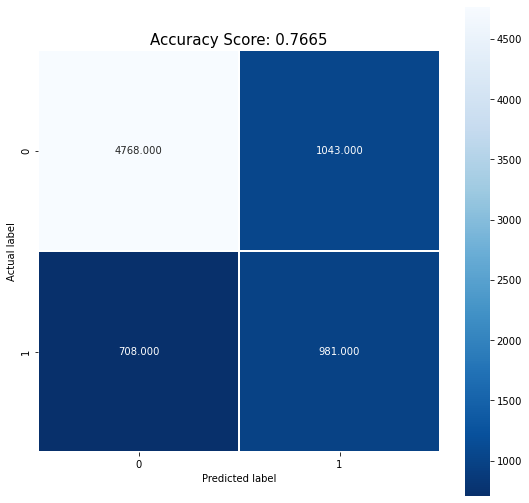

In [90]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_hat_test), 4))
plt.title(all_sample_title, size = 15);

In [89]:
# One problem for logreg is that the rates of default is quite lower than non-default
# Hence the large false positives

AUC: 0.7006649360112948


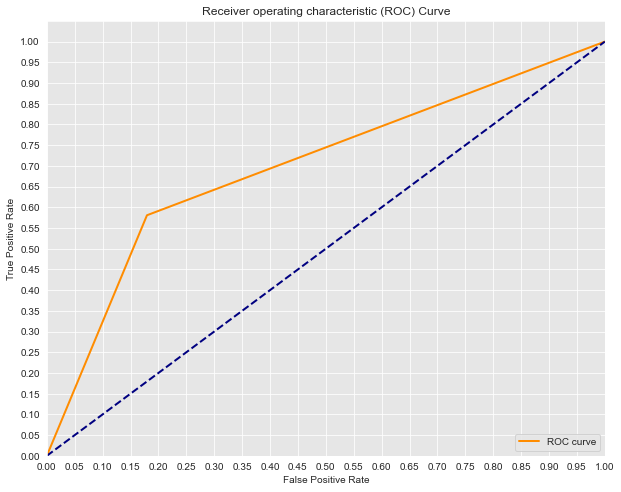

In [92]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()